# Chapter 8: Hierarchical Clustering

In [1]:
%reset
low_memory=False
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 1.1 Introduction & Motivation

The $k$ Means algorithm is absolutely awesome in detecting clusters when we know beforehand exactly how many clusters we're going to have. But like we already saw, it becomes a little bit more complicated when we don't know beforehand. We could calculate some kind of metric (like we did), then fit loads of $k$Means models, and compare them all. Or, we could use **Hierarchical Clustering**.

## 1.2 Problem Setting

We're still working with the unsupervised version of the digits dataset. For more information, refer to the previous chapter.

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

## 1.3 Model

### 1.3.1 Model

The idea of hierarchical clustering is exceedingly simple. Consider the following dataset:

![](https://s3.amazonaws.com/stackabuse/media/hierarchical-clustering-python-scikit-learn-1.png)

We can obviously see two clusters here, but we need a new algorithm to calculate them. We'll start off by giving each observation its own cluster. Then, we'll calculate the distance between all points/clusters. The two points closest together will merge together into one cluster. We continue this process until we've got all points in 1 cluster. Like that, we have formed a solution for each possible amount of clusters. Graphically, it will look like this: 

![](https://s3.amazonaws.com/stackabuse/media/hierarchical-clustering-python-scikit-learn-2.png)

We can now cut off the tree wherever we want, to end up with a prediction for the exact amount of clusters we desire:

![](https://s3.amazonaws.com/stackabuse/media/hierarchical-clustering-python-scikit-learn-4.png)

### 1.3.2 Model Estimation

We'll start off by fitting the Dendogram:

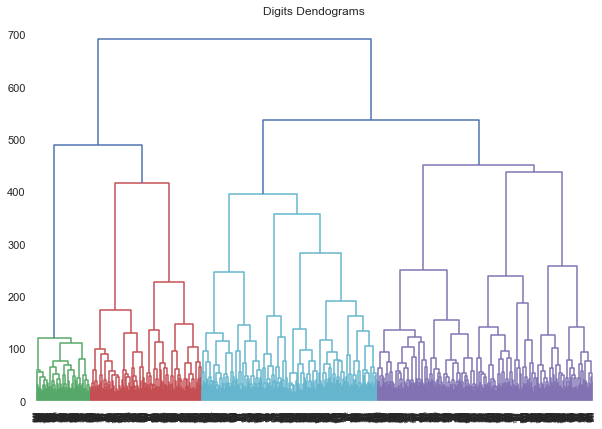

In [3]:
plt.figure(figsize=(10, 7))
plt.title("Digits Dendograms")
dend = shc.dendrogram(shc.linkage(digits.data, method='ward'))

Normally we would draw our line (read: cutoff point) where the largest distance is without merging. We can immediately see why Hierarchical Clustering is so nice. If certain figures look too hard alike, we can simply allow for an additional cluster so it comes out better.

In this case, however, we'll continue by fitting our model for 10 clusters:

In [8]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(digits.data)

array([7, 9, 4, ..., 4, 1, 4])

## 1.4 Exercises

##### Question 1: Try to fit the elbow plot for the hierarchical clustering model on the digits dataset.
##### Question 2: Try to split the dataset between test and train and check how accurate the best possible hierarchical clustering model is.
##### Question 3: Compare the hierarchical clustering and the $k$ means clustering algorithm for this dataset. Report. Which one provides the best fit? Why?